- build base GRN for celloracle

In [2]:
import os

import pandas as pd
import numpy as np
from celloracle import motif_analysis as ma

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
peak = pd.read_csv('../../data/bulkATAC/GBM_peakCalls.txt', delimiter = '\t')
peak

,seqnames,start,end,name,score,annotation,percentGC,percentAT
0,chr1,1291763,1292264,GBM_49,4.537794,3' UTR,0.636727,0.363273
1,chr1,1440804,1441305,GBM_77,6.248321,3' UTR,0.660679,0.339321
2,chr1,1752571,1753072,GBM_99,3.803710,3' UTR,0.572854,0.427146
3,chr1,2189426,2189927,GBM_125,25.230430,3' UTR,0.660679,0.339321
4,chr1,2528871,2529372,GBM_171,3.138748,3' UTR,0.610778,0.389222
...,...,...,...,...,...,...,...,...
77159,chrY,14522382,14522883,GBM_77138,3.198292,Promoter,0.497006,0.502994
77160,chrY,19075837,19076338,GBM_77144,14.949381,Promoter,0.566866,0.433134
77161,chrY,19077291,19077792,GBM_77146,5.161999,Promoter,0.606786,0.393214
77162,chrY,19744472,19744973,GBM_77149,8.749307,Promoter,0.483034,0.516966


In [16]:
peak['score'].describe()

count    77164.000000
mean        12.959411
std         26.202244
min          2.756289
25%          4.579952
50%          7.023645
75%         13.909626
max       2527.059401
Name: score, dtype: float64

<AxesSubplot: xlabel='score', ylabel='Count'>

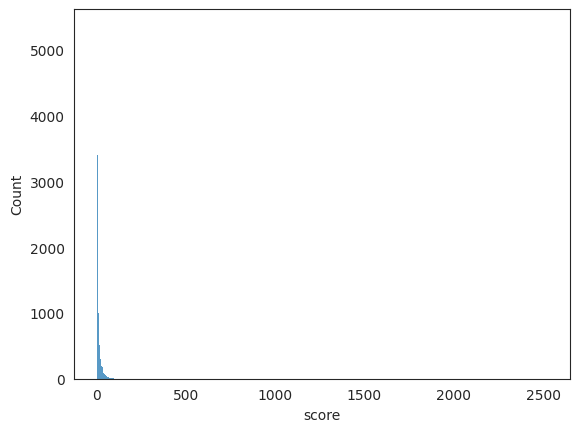

In [22]:
sns.histplot(peak['score'])

# 1. Data prep

In [4]:
bed = peak[["seqnames", "start", "end"]]
bed.rename(columns = {"seqnames" : "chrom"}, inplace = True)
bed["seqname"] = bed["chrom"] + "_" + bed["start"].astype(str) + "_" + bed["end"].astype(str)
bed

,chrom,start,end,seqname
0,chr1,1291763,1292264,chr1_1291763_1292264
1,chr1,1440804,1441305,chr1_1440804_1441305
2,chr1,1752571,1753072,chr1_1752571_1753072
3,chr1,2189426,2189927,chr1_2189426_2189927
4,chr1,2528871,2529372,chr1_2528871_2529372
...,...,...,...,...
77159,chrY,14522382,14522883,chrY_14522382_14522883
77160,chrY,19075837,19076338,chrY_19075837_19076338
77161,chrY,19077291,19077792,chrY_19077291_19077792
77162,chrY,19744472,19744973,chrY_19744472_19744973


In [5]:
peaks = ma.process_bed_file.df_to_list_peakstr(bed)
peaks

array(['chr1_1291763_1292264', 'chr1_1440804_1441305',
       'chr1_1752571_1753072', ..., 'chrY_19077291_19077792',
       'chrY_19744472_19744973', 'chrY_20575376_20575877'], dtype=object)

In [6]:
tss_annotated = ma.get_tss_info(peak_str_list = peaks, ref_genome = "hg38")
tss_annotated

que bed peaks: 77164
tss peaks in que: 23613


,chr,start,end,gene_short_name,strand
0,chr7,130668536,130669037,COPG2,-
1,chr3,12796382,12796883,CAND2,+
2,chr10,96043256,96043757,CCNJ,+
3,chr6,116253879,116254380,DSE,-
4,chr21,29019157,29019658,RWDD2B,-
...,...,...,...,...,...
23608,chr5,149550136,149550637,CSNK1A1,-
23609,chr5,149550789,149551290,CSNK1A1,-
23610,chr5,149551296,149551797,CSNK1A1,-
23611,chr20,10673834,10674335,JAG1,-


In [7]:
peak_id_tss = ma.process_bed_file.df_to_list_peakstr(tss_annotated)
tss_annotated = pd.DataFrame({"peak_id": peak_id_tss,
                              "gene_short_name": tss_annotated.gene_short_name.values})
tss_annotated = tss_annotated.reset_index(drop=True)
print(tss_annotated.shape)
tss_annotated.head()

(23613, 2)


,peak_id,gene_short_name
0,chr7_130668536_130669037,COPG2
1,chr3_12796382_12796883,CAND2
2,chr10_96043256_96043757,CCNJ
3,chr6_116253879_116254380,DSE
4,chr21_29019157_29019658,RWDD2B


# 2. TF motif scan

In [8]:
peaks = ma.check_peak_format(tss_annotated, "hg38", genomes_dir = None)
peaks

Peaks before filtering:  23613
Peaks with invalid chr_name:  0
Peaks with invalid length:  0
Peaks after filtering:  23613


,peak_id,gene_short_name
0,chr7_130668536_130669037,COPG2
1,chr3_12796382_12796883,CAND2
2,chr10_96043256_96043757,CCNJ
3,chr6_116253879_116254380,DSE
4,chr21_29019157_29019658,RWDD2B
...,...,...
23608,chr5_149550136_149550637,CSNK1A1
23609,chr5_149550789_149551290,CSNK1A1
23610,chr5_149551296_149551797,CSNK1A1
23611,chr20_10673834_10674335,JAG1


In [9]:
tfi = ma.TFinfo(peak_data_frame=peaks, ref_genome="hg38", genomes_dir=None)

In [10]:
tfi.scan(fpr=0.02, motifs=None, verbose=True) # Default : “gimme.vertebrate.v5.0.”

No motif data entered. Loading default motifs for your species ...


 Default motif for vertebrate: gimme.vertebrate.v5.0. 
 For more information, please see https://gimmemotifs.readthedocs.io/en/master/overview.html 

Initiating scanner... 



2024-12-19 01:05:07,265 - DEBUG - using background: genome hg38 with size 200


Calculating FPR-based threshold. This step may take substantial time when you load a new ref-genome. It will be done quicker on the second time. 

Motif scan started .. It may take long time.



Scanning:   0%|          | 0/20132 [00:00<?, ? sequences/s]

In [12]:
tfi.to_hdf5('../../output/base_GRN_from_bulkATAC.celloracle.tfinfo')

In [13]:
tfi.scanned_df.head()

,seqname,motif_id,factors_direct,factors_indirect,score,pos,strand
0,chr10_100009754_100010255,GM.5.0.Mixed.0001,,"SRF, EGR1",8.578792,42,-1
1,chr10_100009754_100010255,GM.5.0.Mixed.0001,,"SRF, EGR1",8.319869,301,-1
2,chr10_100009754_100010255,GM.5.0.Mixed.0001,,"SRF, EGR1",7.919846,409,-1
3,chr10_100009754_100010255,GM.5.0.Mixed.0001,,"SRF, EGR1",7.680395,410,-1
4,chr10_100009754_100010255,GM.5.0.Mixed.0001,,"SRF, EGR1",7.575280,38,-1


In [14]:
len(tfi.scanned_df)

7260668

In [15]:
tfi.reset_filtering()
tfi.filter_motifs_by_score(threshold=10)
tfi.make_TFinfo_dataframe_and_dictionary(verbose=True)

Filtering finished: 7260668 -> 1533591
1. Converting scanned results into one-hot encoded dataframe.


  0%|          | 0/20132 [00:00<?, ?it/s]

2. Converting results into dictionaries.


  0%|          | 0/14975 [00:00<?, ?it/s]

  0%|          | 0/1092 [00:00<?, ?it/s]

In [16]:
df = tfi.to_dataframe()
df

,peak_id,gene_short_name,9430076C15RIK,AC002126.6,AC012531.1,AC226150.2,AFP,AHR,AHRR,AIRE,...,ZNF784,ZNF8,ZNF816,ZNF85,ZSCAN10,ZSCAN16,ZSCAN22,ZSCAN26,ZSCAN31,ZSCAN4
0,chr10_100009754_100010255,DNMBP,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr10_100185824_100186325,ERLIN1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr10_100186342_100186843,ERLIN1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr10_100229367_100229868,CHUK,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr10_100267465_100267966,CWF19L1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21863,chrY_20575376_20575877,EIF1AY,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21864,chrY_2841332_2841833,RPS4Y1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21865,chrY_2935076_2935577,ZFY,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
21866,chrY_7273679_7274180,PRKY,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df.to_parquet('../../output/base_GRN_from_bulkATAC.parquet')